In [3]:
import pandas as pd
import numpy as np

import os
import sys

!pip install librosa
# !pip install lifelines
# !pip install np_utils
# !pip install tensorflow

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

     -------------------------------------- 253.7/253.7 kB 7.9 MB/s eta 0:00:00
     -------------------------------------- 184.6/184.6 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 8.0 MB/s eta 0:00:00



In [5]:
#Import the dataset to use
import pandas as pd
landmarks_df = pd.read_csv('demo_landmarks.csv')

landmarks_df

,Unnamed: 0,index,label,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_475_z,landmark_476_x,landmark_476_y,landmark_476_z,landmark_477_x,landmark_477_y,landmark_477_z,landmark_478_x,landmark_478_y,landmark_478_z
0,0,0,happy,0.507577,0.690504,-0.067539,0.496229,0.623151,-0.169093,0.502712,...,-0.007745,0.644046,0.382131,-0.007746,0.616720,0.409790,-0.007778,0.648537,0.432745,-0.007774
1,1,1,happy,0.506913,0.685366,-0.056324,0.531459,0.619465,-0.139276,0.513914,...,0.030370,0.604874,0.417298,0.030375,0.580915,0.438486,0.030342,0.605856,0.459424,0.030347
2,2,2,happy,0.529042,0.675124,-0.048689,0.521464,0.605306,-0.131408,0.522370,...,0.001254,0.629228,0.374716,0.001255,0.608027,0.400481,0.001223,0.634681,0.421634,0.001229
3,3,3,happy,0.599993,0.747104,-0.070677,0.613960,0.620251,-0.156688,0.594227,...,0.073009,0.664438,0.387820,0.073013,0.648348,0.409021,0.072974,0.671501,0.424706,0.072984
4,4,4,happy,0.493806,0.719292,-0.075153,0.504832,0.598530,-0.145169,0.502998,...,0.028723,0.658979,0.422724,0.028730,0.630458,0.440460,0.028699,0.653501,0.464135,0.028702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13571,13571,13571,neutral,0.504123,0.720507,-0.046975,0.509277,0.640532,-0.119010,0.507253,...,-0.003078,0.620796,0.442554,-0.003075,0.599171,0.462500,-0.003106,0.620639,0.481957,-0.003103
13572,13572,13572,neutral,0.497067,0.734362,-0.066890,0.482076,0.643645,-0.148767,0.489366,...,-0.016498,0.646841,0.384284,-0.016496,0.616515,0.414354,-0.016534,0.647837,0.443698,-0.016528
13573,13573,13573,neutral,0.495357,0.695052,-0.030546,0.516039,0.628310,-0.141734,0.505505,...,-0.001490,0.661572,0.363049,-0.001487,0.627144,0.388726,-0.001521,0.656633,0.417313,-0.001518
13574,13574,13574,neutral,0.515543,0.673966,-0.084770,0.523678,0.591117,-0.129465,0.516794,...,0.054924,0.620038,0.450670,0.054927,0.594984,0.468980,0.054898,0.617746,0.490170,0.054905


In [12]:
#Get the inputs (All landmarks)
x_landmarks_df = landmarks_df.iloc[:,3:]
x_landmarks_df

,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,landmark_3_y,landmark_3_z,landmark_4_x,...,landmark_475_z,landmark_476_x,landmark_476_y,landmark_476_z,landmark_477_x,landmark_477_y,landmark_477_z,landmark_478_x,landmark_478_y,landmark_478_z
0,0.507577,0.690504,-0.067539,0.496229,0.623151,-0.169093,0.502712,0.643993,-0.086510,0.467229,...,-0.007745,0.644046,0.382131,-0.007746,0.616720,0.409790,-0.007778,0.648537,0.432745,-0.007774
1,0.506913,0.685366,-0.056324,0.531459,0.619465,-0.139276,0.513914,0.632298,-0.069509,0.504124,...,0.030370,0.604874,0.417298,0.030375,0.580915,0.438486,0.030342,0.605856,0.459424,0.030347
2,0.529042,0.675124,-0.048689,0.521464,0.605306,-0.131408,0.522370,0.623367,-0.064017,0.490133,...,0.001254,0.629228,0.374716,0.001255,0.608027,0.400481,0.001223,0.634681,0.421634,0.001229
3,0.599993,0.747104,-0.070677,0.613960,0.620251,-0.156688,0.594227,0.654728,-0.082240,0.557118,...,0.073009,0.664438,0.387820,0.073013,0.648348,0.409021,0.072974,0.671501,0.424706,0.072984
4,0.493806,0.719292,-0.075153,0.504832,0.598530,-0.145169,0.502998,0.630493,-0.080717,0.485267,...,0.028723,0.658979,0.422724,0.028730,0.630458,0.440460,0.028699,0.653501,0.464135,0.028702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13571,0.504123,0.720507,-0.046975,0.509277,0.640532,-0.119010,0.507253,0.659203,-0.054190,0.487693,...,-0.003078,0.620796,0.442554,-0.003075,0.599171,0.462500,-0.003106,0.620639,0.481957,-0.003103
13572,0.497067,0.734362,-0.066890,0.482076,0.643645,-0.148767,0.489366,0.668186,-0.069688,0.457620,...,-0.016498,0.646841,0.384284,-0.016496,0.616515,0.414354,-0.016534,0.647837,0.443698,-0.016528
13573,0.495357,0.695052,-0.030546,0.516039,0.628310,-0.141734,0.505505,0.636442,-0.051140,0.499278,...,-0.001490,0.661572,0.363049,-0.001487,0.627144,0.388726,-0.001521,0.656633,0.417313,-0.001518
13574,0.515543,0.673966,-0.084770,0.523678,0.591117,-0.129465,0.516794,0.622345,-0.076262,0.497495,...,0.054924,0.620038,0.450670,0.054927,0.594984,0.468980,0.054898,0.617746,0.490170,0.054905


In [22]:
#Get the labels
y_landmarks_df = landmarks_df['label']

encoder = OneHotEncoder()
y_landmarks_df = encoder.fit_transform(np.array(y_landmarks_df).reshape(-1,1)).toarray()

y_landmarks_df

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [23]:
#Split the dataset to training and test sets (80% training, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_landmarks_df, y_landmarks_df, test_size=0.2, random_state=69)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10860, 1434, 1), (10860, 4), (2716, 1434, 1), (2716, 4))

In [26]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=4, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 1434, 256)         1536      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 717, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 717, 256)          327936    
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 359, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 359, 128)          163968    
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 180, 128)         

In [28]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.001)
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[rlrp])

Epoch 1/50
170/170 [==============================] - 53s 312ms/step - loss: 1.0285 - accuracy: 0.5182 - val_loss: 0.9297 - val_accuracy: 0.5847 - lr: 0.0010
Epoch 2/50
170/170 [==============================] - 54s 317ms/step - loss: 1.0097 - accuracy: 0.5262 - val_loss: 0.9787 - val_accuracy: 0.5755 - lr: 0.0010
Epoch 3/50
170/170 [==============================] - 54s 319ms/step - loss: 0.9953 - accuracy: 0.5341 - val_loss: 0.9237 - val_accuracy: 0.5920 - lr: 0.0010
Epoch 4/50
170/170 [==============================] - 54s 318ms/step - loss: 0.9834 - accuracy: 0.5382 - val_loss: 0.9053 - val_accuracy: 0.6094 - lr: 0.0010
Epoch 5/50
170/170 [==============================] - 53s 312ms/step - loss: 0.9805 - accuracy: 0.5402 - val_loss: 0.9044 - val_accuracy: 0.6071 - lr: 0.0010
Epoch 6/50
170/170 [==============================] - 53s 311ms/step - loss: 0.9799 - accuracy: 0.5452 - val_loss: 0.8828 - val_accuracy: 0.6123 - lr: 0.0010
Epoch 7/50
170/170 [==============================] 

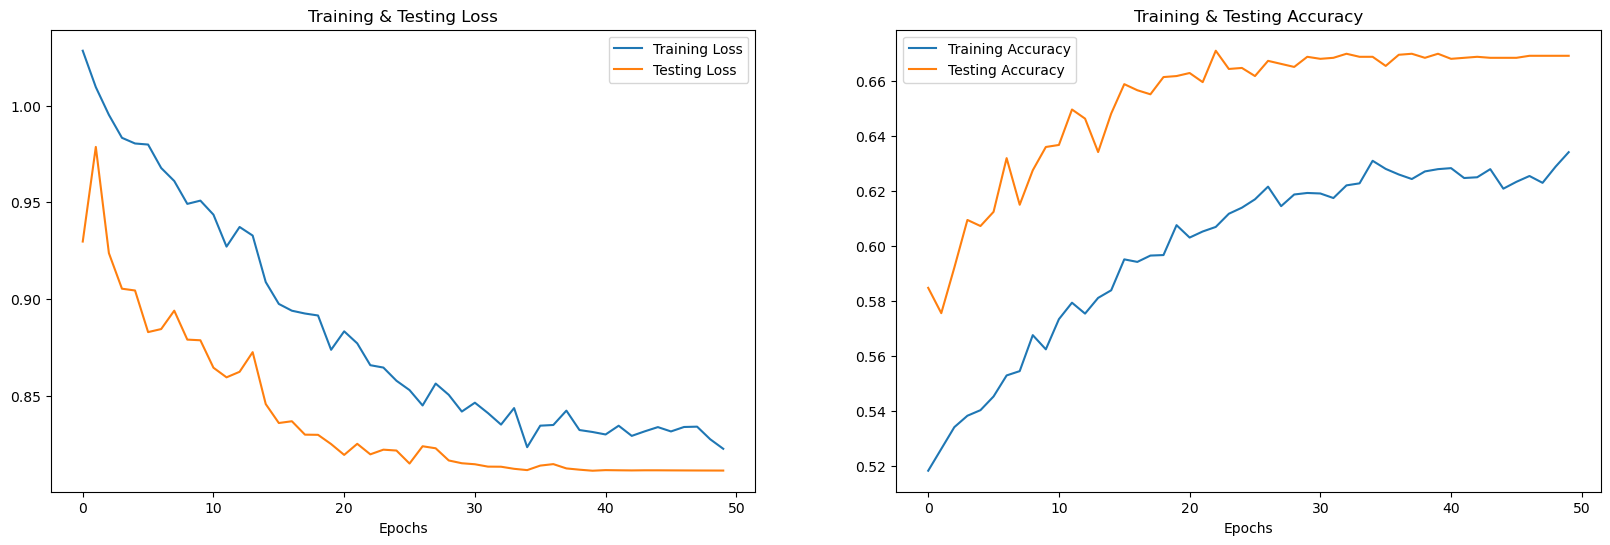

In [29]:
epochs = [i for i in range(50)]
fig, ax = plt.subplots(1,2)
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
test_accuracy = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs, train_loss, label = 'Training Loss')
ax[0].plot(epochs, test_loss, label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs, train_accuracy, label = 'Training Accuracy')
ax[1].plot(epochs, test_accuracy, label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [30]:
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

85/85 [==============================] - 4s 42ms/step


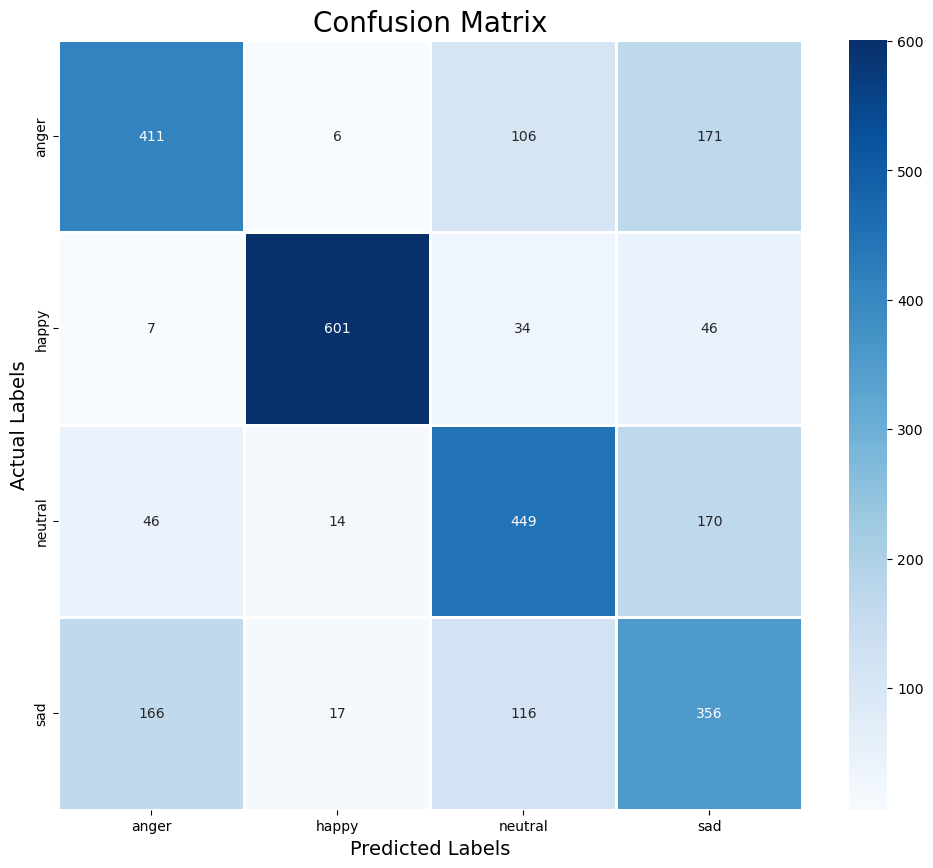

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()